# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) 

# Final Project, Part 4: Modeling Performance



# 1. Data and Coding Preparation

#### Imports

In [1]:
from __future__ import division
# from my_func import get_linear_model_metrics, time_diff, time_add, time_subtract, dark_mins, race_plan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import time
from sklearn import feature_selection, linear_model, metrics, model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

#### Functions

In [2]:
# function to fit model and return key metrics (p-values, coeff, y-int, r-sq)

def get_linear_mMy odel_metrics_(X, y, algo):
    pvals = feature_selection.f_regression(X, y)[1]  # get the pvalue of X given y. Ignore f-stat for now. 
    algo.fit(X,y)                                    # .fit() runs the linear regression function on X and y
    residuals = (y-algo.predict(X)).values
    print('P Values:', pvals)                        # print metrics that are important
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    plt.figure()
    plt.hist(residuals)
    return algo

SyntaxError: invalid syntax (<ipython-input-2-c95ecb91943f>, line 3)

In [3]:
def time_diff(t_start, t_end):
    diff_mins = (t_end - t_start).seconds/60
    return diff_mins

def time_add(t1, add_mins):
    dur_hr =  int(add_mins/60)
    dur_min = int(add_mins)-(dur_hr*60)
    dur_sec = int((add_mins-int(add_mins))*60)
    add_time = t1 + timedelta(hours = dur_hr, minutes = dur_min, seconds = dur_sec)
    return(add_time)

def time_subtract(t2, sub_mins):
    dur_hr =  int(sub_mins/60)
    dur_min = int(sub_mins)-(dur_hr*60)
    dur_sec = int((sub_mins-int(sub_mins))*60)
    sub_time = t2 - timedelta(hours = dur_hr, minutes = dur_min, seconds = dur_sec)
    return(sub_time)

def dark_mins(t_arr, s_dur):
    if t_arr > sunset:
        if s_dur > time_diff(sunset, t_arr):
            mins_dark = time_diff(sunset, t_arr)
        else:
            mins_dark = s_dur
    else:    
        t_dep = time_subtract(t_arr, s_dur)
        if t_dep < sunrise:
            if t_arr < sunrise:
                mins_dark = s_dur
            else:
                mins_dark = time_diff(t_dep, sunrise)
        else:
            mins_dark = 0
    
    return(mins_dark)


In [4]:
def race_plan_(pace_s1, pace_s2, pace_s3, pace_s4, pace_s5, pace_s6, pace_s7, pace_s8, r2, m_name):
    
    out_cols = ['Model Name','Segment', 'Distance', 'Pace (mins/km)','Duration (mins)', 'Race Time','Arrival Time', 
                'Gels Taken', 'Perpetuam (1 tab)','Fluids Taken (ml)', 'Dark (mins)', 'R2']    
    plan_df = pd.DataFrame(columns = out_cols)

    label = 's1'
    seg_pace = pace_s1
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = dur
    mins = str(c_dur/60-int(c_dur/60)*60)
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur) 
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's2'
    seg_pace = pace_s2
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)

    label = 's3'
    seg_pace = pace_s3
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's4'
    seg_pace = pace_s4
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's5'
    seg_pace = pace_s5
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's6'
    seg_pace = pace_s6
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's7'
    seg_pace = pace_s7
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 's8'
    seg_pace = pace_s8
    dis = df['dist_' + str(label)].max()
    dur = seg_pace * dis
    c_dur = c_dur + dur
    r_time = str(int(c_dur/60)) + "h " + str(int((c_dur/60-int(c_dur/60))*60)) + "m"
    arr = time_add(start,c_dur) 
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = dark_mins(arr,dur)
    c_dark = c_dark + dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    label = 'fin'
    dis = race_dist
    dur = c_dur
    seg_pace = c_dur/race_dist
    arr = time_add(start,c_dur)
    gel = dur / 60 * gel_hr
    perp = dur / 60 * perp_hr
    fluid = dur / 60 * fluid_hr
    dark = c_dark
    seg_df = pd.DataFrame([[m_name, label, dis, seg_pace, dur, r_time, arr, gel, perp, fluid, dark, r2]], columns=out_cols)    
    plan_df = plan_df.append(seg_df)
    
    return(plan_df)   

#### Reading in Data and Setting Key Race Information

In [5]:
df = pd.read_csv('./scc_data.csv')
df2 = pd.read_csv('../Data/Results/TF Results.csv')

df2['dur_bkt'] = df2.dur_hrs.map(lambda x: '>5hrs' if x > 5 else '3-5hrs' if x >= 3 else '<3hrs')
df2['field_size'] = df2['o_tot'].apply(lambda x: 'small' if x < df2['o_tot'].quantile(.25)
                                       else 'medium' if x < df2['o_tot'].quantile(.75) else 'large')

df2['course_gain'] = df2['gain_km'].apply(lambda x: 'flat' if x < df2['gain_km'].quantile(.25)
                                       else 'hills' if x < df2['gain_km'].quantile(.75) else 'mountains')

In [6]:
segments = ['s1','s2','s3','s4','s5','s6','s7','s8','fin']   # set race segments
FMT = '%H:%M:%S'
cal_hr, gel_hr, perp_hr, fluid_hr = 300, 1, 1, 700   # set nutrition requirements parameters
ctl, tsb, v02, int_f = 70, 20, 54, .67               # set fitness and effort parameters
race_dist = 100                                      # race distance
start = datetime.strptime('7:30:00', FMT)            # race start time
sunrise = datetime.strptime('5:55:00', FMT)          # civil twilight start
sunset = datetime.strptime('18:36:00', FMT)          # civil twilight end
est_hr = 141
entrants = df[['event_year','ath_cat']].groupby(['event_year']).count().iloc[2].at['ath_cat']

 
# 2.0 Exploratory Data Analysis Summary


### Project Problem and Hypothesis

##### Why is pacing important?

As ultra marathon running races get longer, race day pacing strategies become much more critical to optimise the performance of an athlete. Two key reasons are:

1. Starting too fast leads to sub-optimal performance

2. Time, not distance, is critical for race planning


#### Isn't there a pacing solution available?

For shorter distances, runners can practice pacing in training.  However, as races get longer, an athlete cannot readily determine this optimum pace over a long distance as the injury risk and recovery requirements mean that an athlete cannot practice running this distance prior to the race. Runners also cannot always revert to races they ran in previous years as fitness levels change over time and, unless the previous race was on the same course, each course elevation profile requires a different pacing strategy.  


#### The Ultra Marathon Pacing Tool Solution

To resolve this, the UM pacing tool will predict optimum pace (minutes per km) per race segment based on the hypothesis that an athletes current level of fitness, the course profile and an ideal pacing strategy are key determinants of this optimum pacing strategy.  It will also convert this pace to duration in order to estimate nutrition requirements and expected time of arrival (and departure) at each aid station for spectators.

To predict this pace and therefore duration, four input variables will be taken into consideration:
1. 'Flat land' 100km pace in mins/km (fl100)
2. Adjusting pace for gradient in % of average pace per km (gap)
3. Adjusting pace for cardiac drift, which is the natural fatigue a runner experiences over endurance events as a % of average pace per leg (drift).
4. Adding for rest time in aid stations in minutes (rest).

To predict the value for each of these variables, there are 3 key data sources that will be used:
a. Analysing athletes results who previously competed in the target race.
b. Using an athlete's own workout data for various races to calculate pacing predictions.
c. Collecting course information such as distance between segments and elevation.

This scope of this initial solution is to develop a pacing strategy for myself for the Surf Coast Century, but can then benefit other ultra-marathoners by plugging in other course profiles, workout data and race results.

### Data Dictionary

There are three key data sources that are being used for this project.  The first are the surfcoast century results from 2015-2017.  The second is the course data to understand the terrain of the course.  The third is a series of my own workouts to help produce my own personal pace and heart rate equation for different race distances.  

**1. Surf Coast Century Race Results**

Variable Name | Description | Type of Variable 
---|---|---
o_pos_fin  |Overall finishing position |int64  
ath_name  |Name of Athlete / Team | object 
time_fin  |Overall finishing time | datetime64
ath_cat  |Age group or team category | object 
c_pos_fin  |Finishing position for category | int64 
gender  |Male or Female | object 
g_pos_fin  |Finishing position for Gender | int64  
time_s1  |Time taken to complete segment 1 | datetime64 
time_s2  |Time taken to complete segment 2 | datetime64 
time_s3 |Time taken to complete segment 3 | datetime64 
time_s4  |Time taken to complete segment 4 | datetime64 
time_s5  |Time taken to complete segment 5 | datetime64 
time_s6  |Time taken to complete segment 6 | datetime64 
time_s7  |Time taken to complete segment 7 | datetime64 
time_s8  |Time taken to complete segment 8 | datetime64 
event_year  | Year of the event that the results were from | int64 



**2. Course Profiles**

Variable Name | Description | Type of Variable 
---|---|---
segment |  The segment number for the course (SCC has 8 segments) | object 
e_gain |  Elevation gain in metres per kilometre travelled. | float64 
e_loss |  Elevation loss in metres per kilometre travelled. | float64 
dist |  Distance (km) of the segment. | float64 
p_comp |  Percentage of the race that has been completed at the end of the segment. | float64 
beach |  % of segment that is on the beach. | float64
trail |  % of segment that is on trails. | float64

**3. Personal Race Data**

Variable Name | Description | Type of Variable 
---|---|---
date | Date of the race. | datetime
race | Name of the race. | object
distance | Distance (km) of the race. | Int
time | Duration taken to complete the race. | datetime
dur_hrs | Duration (hrs) taken to complete the race. | float64
mins_km | Running pace in minutes per km. | int64
training_load (ctl) | Common metric to measure the amount of training completed in the lead up to a race. | int
recovery (tsb) | Common metric to measure how well tapered the athlete is for the race. | int
fitness (v02) | Estimated v02, a common fitness measure. | int
if | A measure of intensity for as workout (%) | float64
hr | Average heart rate for the event. | int
gain_km | Elevation gain in metres per kilometre travelled. | float64 
loss_km | Elevation loss in metres per kilometre travelled. | float64 
change_km | Elevation change (gain + loss) in metres per kilometre travelled. | float64 
a_per | Age group placing divided by the total competitors in the age group. | float64
g_per | Gender placing divided by the total competitors for that gender. | float64
o_per | Overall placing divided by the total overall competitors. | float64
f_per | Hypothetical female placing divided by the total female competitors. | float64


# 3. Predicting an ultra based on own pace in previous races.

Two models have been chosen to predict a pace for each segment in the Surfcoast Century Ultra.

1) A Linear Regression model which provides transparency to each of the coefficients.

2) A Random Forest Regressor model which provides a 'black box' solution to fitting but is more efficient at not overfitting or being impacted by multicolinearation.


### 3.1 Choosing independent variables

In [16]:
modeldata.head(3)

,distance,gain_km,training_load (ctl),recovery (tsb),fitness (v02)
0,11,15,68,10,52
1,15,11,63,11,57
2,15,11,73,14,55


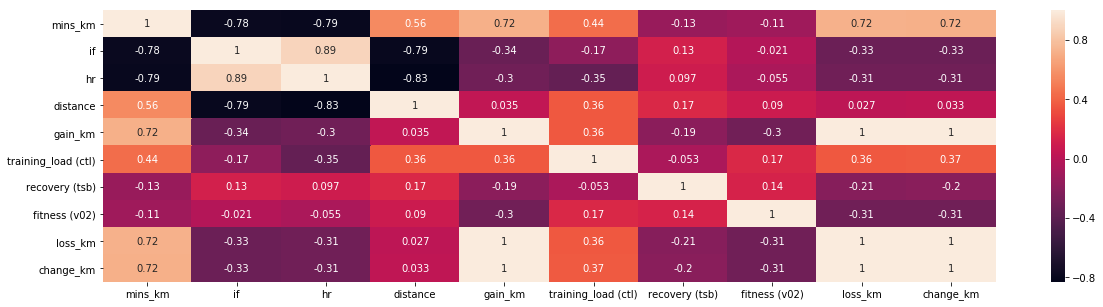

In [17]:
time_df = df2[['mins_km', 'if', 'hr', 'distance', 'gain_km', 'training_load (ctl)', 'recovery (tsb)', 'fitness (v02)', 
               'loss_km', 'change_km', 'dur_bkt']]
plt.figure(figsize=(20,5))
sns.heatmap(time_df.corr(), annot=True);

The y value is minutes per km (mins_km) and is strongley correlated with effort (if, hr), course (gain/loss/change) and distance.  Fitness variables (CTL, TSB, V02max) have weaker correlation to mins_km but don't have any colinearisation either, so will also be included in the initial model.

Variable to be using | Colinear variables to drop | Reason for picking the variable
---|---|---
distance | if, hr, dur_hrs | Distance is needed as an x value to be able to predict min_km for distance at 100km.
gain_km | loss_km, change_km | Each of the 3 variables are stronger correlated and elevation gain is the most widely used metric to explain terrain.
training load (ctl) | None | Will be in the initial model and removed if not a critical variable.
recovery (tsb) | None | Will be in the initial model and removed if not a critical variable.
fitness (v02max) | None | Will be in the initial model and removed if not a critical variable.

Therefore: **Pace (mins_km)** = function(distance, gain_km, training load (ctl), recovery (tsb), fitness (vO2max)).

In [14]:
y = df2.mins_km
modeldata = df2[['distance','gain_km', 'training_load (ctl)', 'recovery (tsb)','fitness (v02)']]

## 3.2 Linear Regression Model

#### Initial Linear Regression Model
The Linear Regression model below performs well on training data with an r2 of 77%.  However, cross-validation variation of MSA (0.09 - 2.18) indicates that the model is not well suited to testing data.

In [31]:
lm = linear_model.LinearRegression()
model = lm.fit(modeldata, y)

print("~~~~ Linear Regression Model ~~~~")
print('MSE:', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('R2: ', lm.score(modeldata, y))

mse = model_selection.cross_val_score(lm, modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(lm, modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ Linear Regression Model ~~~~
MSE: 0.22884794462648178
R2:  0.8092349149718454

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
MSE = 0.8140517395166871[0.57672075 0.56772069 0.15558377 1.14583062 1.62440286]
r2 = 0.618231820258402[1.13644589 0.33858506 0.11369914 0.82653429 0.67589473]


#### Regularisation of the Linear Regression Model
Regularisation will be used to address the variation of MSE on the test data set.  Given the lack of colinearity in the dataset, **lasso** has been selected for regularisation.  MSE has increased from the linear regression model as it is becoming more generalisable.  This can also be seen in the reduction in variation of MSA across each of the folds (0.07 - 1.41).

In [32]:
lasso = linear_model.Lasso() 
lasso.fit(modeldata, y) 

print("~~~~ Lasso Model ~~~~")
print('MSE: {}'.format(metrics.mean_squared_error(y, lasso.predict(modeldata))))
print('R2: ', lasso.score(modeldata, y))

mse = model_selection.cross_val_score(linear_model.Lasso(), modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(linear_model.Lasso(), modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ Lasso Model ~~~~
MSE: 0.252715187056994
R2:  0.7893394488400628

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
MSE = 0.5419349977027529[0.15769548 0.46314502 0.0514439  1.35829919 0.6790914 ]
r2 = -0.017943985300291197[-0.4158215   0.0920141  -0.63175448  1.16522407 -0.29938212]


#### Fine Tuning the Linear Regression Model

To tune the model, gridsearch is used to optimise each of the tuning parameters, with parameters selecting being alpha, fit_intercept and normalize.  MSE on training data increased from 0.30 to 0.32, but reduced on testing data from 0.64 to 0.61, indicating a more generised model.

In [33]:
params = {'alpha': np.logspace(-1, 10, 30), 'fit_intercept': [True, False], 'normalize': [True, False]}
gs = model_selection.GridSearchCV(linear_model.Lasso(), 
                                  param_grid = params, 
                                  cv = 5, 
                                  n_jobs = -1, 
                                  scoring = 'neg_mean_squared_error')
gs.fit(modeldata, y);
print("~~~~ BEST PARAMETERS ~~~~")
print('Best parameters: {}'.format(gs.best_params_))

t_lasso = linear_model.Lasso(alpha=1.3738237958832624, fit_intercept = True, normalize = False) 
t_lasso.fit(modeldata, y)
print("\n~~~~ Tuned vs Lasso Model ~~~~")
print('MSE: {} vs {}'.format(metrics.mean_squared_error(y, t_lasso.predict(modeldata)), 
                             metrics.mean_squared_error(y, lasso.predict(modeldata))))
print('r2: {} vs {}'.format(t_lasso.score(modeldata, y), lasso.score(modeldata, y)))

mse = model_selection.cross_val_score(t_lasso, modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(t_lasso, modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION FOR TUNED LASSO ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ BEST PARAMETERS ~~~~
Best parameters: {'alpha': 1.3738237958832624, 'fit_intercept': True, 'normalize': False}

~~~~ Tuned vs Lasso Model ~~~~
MSE: 0.2677898956880702 vs 0.252715187056994
r2: 0.7767733404641471 vs 0.7893394488400628

~~~~ SUMMARY OF CROSS VALIDATION FOR TUNED LASSO ~~~~
MSE = 0.515775767244151[0.09037649 0.46650978 0.05793557 1.48939891 0.47465809]
r2 = -0.05732612007046509[-0.66520282  0.09994762 -0.58528586  1.37420621 -0.51029575]


#### Predicting race performance using the Tuned Lasso Model.

In [34]:
p_df = pd.DataFrame(columns =['seg', 'pace'])
for s in segments:
    gain = df['e_gain_' + s].max()/df['dist_' + s].max()
    scc_df = pd.DataFrame({'distance': [race_dist], 'gain_km': [gain], 'training_load (ctl)': [ctl],
                       'recovery (tsb)': [tsb], 'fitness (v02)': [v02]})
    pace = t_lasso.predict(scc_df).max()
    seg_predict_df = pd.DataFrame([[s,pace]], columns=['seg', 'pace'])    
    p_df = p_df.append(seg_predict_df)

name_a = "Using own race metrics (lasso)"
p_df[p_df['seg'] == 's1']['pace'].max() 
pred_a = race_plan_(p_df[p_df['seg'] == 's1']['pace'].max(), p_df[p_df['seg'] == 's2']['pace'].max(),
                    p_df[p_df['seg'] == 's3']['pace'].max(), p_df[p_df['seg'] == 's4']['pace'].max(),
                    p_df[p_df['seg'] == 's5']['pace'].max(), p_df[p_df['seg'] == 's6']['pace'].max(),
                    p_df[p_df['seg'] == 's7']['pace'].max(), p_df[p_df['seg'] == 's8']['pace'].max(), 
                    t_lasso.score(modeldata, y), name_a)

print("The Tuned Lasso bottom up plan with own race performance metrics results in a predicted finish time of {}.".
     format(pred_a.iloc[8].at['Race Time']))

The Tuned Lasso bottom up plan with own race performance metrics results in a predicted finish time of 13h 29m.


## 3.3 Random Forest Regressor Model

#### Creating the model and determining feature importance

Although the MSE and r2 results from this model are excellent, the results from the feature importance are concerning.  For predicting a race between 20-50km, gain_km will be primary factor with distance being secondary.  However, when competing in 100km or 100 miles ultra's distance would be expected to play a much larger part.  Given the flatter nature of the Surfcoast century, it is expected that this model will predict a much faster time than I am capable of.  This bias is caused by the fact that the dataset only has 10-55km observations in it.

In [35]:
rf = RandomForestRegressor(n_estimators = 20)   
rf.fit(modeldata, y)

features_df = pd.DataFrame({'Features': modeldata.columns, 'Importance Score': rf.feature_importances_})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

print("~~~~ SUMMARY OF RANDOM FOREST ~~~~")
print('r2 score: {}'.format(rf.score(modeldata,y)))
print('mse score: {}'.format(metrics.mean_squared_error(y, rf.predict(modeldata))))
features_df.head()

~~~~ SUMMARY OF RANDOM FOREST ~~~~
r2 score: 0.9274748562748224
mse score: 0.08700350000000019


,Features,Importance Score
1,gain_km,0.719701
0,distance,0.159932
3,recovery (tsb),0.056600
2,training_load (ctl),0.047263
4,fitness (v02),0.016504


To view this bias in the prediction model, the below calculated the predicted finish time for Surfcoast Century using this model, which is at least an hour faster than my best possible expected time.

In [36]:
p_df = pd.DataFrame(columns =['seg', 'pace'])
for s in segments:
    gain = df['e_gain_' + s].max()/df['dist_' + s].max()
    scc_df = pd.DataFrame({'distance': [race_dist], 'gain_km': [gain], 'training_load (ctl)': [ctl],
                       'recovery (tsb)': [tsb], 'fitness (v02)': [v02]})
    pace = rf.predict(scc_df).max()
    seg_predict_df = pd.DataFrame([[s,pace]], columns=['seg', 'pace'])    
    p_df = p_df.append(seg_predict_df)

name_a = "Own race metrics (random forest)"
p_df[p_df['seg'] == 's1']['pace'].max() 
pred_b = race_plan_(p_df[p_df['seg'] == 's1']['pace'].max(), p_df[p_df['seg'] == 's2']['pace'].max(),
                    p_df[p_df['seg'] == 's3']['pace'].max(), p_df[p_df['seg'] == 's4']['pace'].max(),
                    p_df[p_df['seg'] == 's5']['pace'].max(), p_df[p_df['seg'] == 's6']['pace'].max(),
                    p_df[p_df['seg'] == 's7']['pace'].max(), p_df[p_df['seg'] == 's8']['pace'].max(), 
                    rf.score(modeldata,y), name_a)

print("The RF bottom up plan with own race performance metrics results in a predicted finish time of {}.".
     format(pred_b.iloc[8].at['Race Time']))

The RF bottom up plan with own race performance metrics results in a predicted finish time of 9h 19m.


#### Fine Tuning
To address this, a effort variable called intensity factor (if) had been introduced, which has weakened the importance score of gain_km from .74 to .62.

In [37]:
modeldata2 = df2[['distance','gain_km', 'if', 'training_load (ctl)', 'recovery (tsb)','fitness (v02)']]
rf2 = RandomForestRegressor(n_estimators = 20)   
rf2.fit(modeldata2, y)

features_df2 = pd.DataFrame({'Features': modeldata2.columns, 'Importance Score': rf2.feature_importances_})
features_df2.sort_values('Importance Score', inplace=True, ascending=False)

print("~~~~ SUMMARY OF RANDOM FOREST ~~~~")
print('r2 score: {}'.format(rf2.score(modeldata2,y)))
print('mse score: {}'.format(metrics.mean_squared_error(y, rf2.predict(modeldata2))))
features_df2

~~~~ SUMMARY OF RANDOM FOREST ~~~~
r2 score: 0.9603684600307946
mse score: 0.047543272727272684


,Features,Importance Score
1,gain_km,0.551329
2,if,0.243905
0,distance,0.098333
4,recovery (tsb),0.090557
3,training_load (ctl),0.013962
5,fitness (v02),0.001914


This resulted in a slightly more accurate predicted finish time below, but is still at least 30 mins slower than my best possible time.  This is most likely caused by the low number of observations making random forest a less effective model to choose.

In [38]:
p_df = pd.DataFrame(columns =['seg', 'pace'])
for s in segments:
    gain = df['e_gain_' + s].max()/df['dist_' + s].max()
    scc_df = pd.DataFrame({'distance': [race_dist], 'gain_km': [gain], 'if': [int_f], 'training_load (ctl)': [ctl],
                       'recovery (tsb)': [tsb], 'fitness (v02)': [v02]})
    pace = rf2.predict(scc_df).max()
    seg_predict_df = pd.DataFrame([[s,pace]], columns=['seg', 'pace'])    
    p_df = p_df.append(seg_predict_df)

name_b = "Using own race metrics (random forest)"
p_df[p_df['seg'] == 's1']['pace'].max() 
pred_b = race_plan_(p_df[p_df['seg'] == 's1']['pace'].max(), p_df[p_df['seg'] == 's2']['pace'].max(),
                    p_df[p_df['seg'] == 's3']['pace'].max(), p_df[p_df['seg'] == 's4']['pace'].max(),
                    p_df[p_df['seg'] == 's5']['pace'].max(), p_df[p_df['seg'] == 's6']['pace'].max(),
                    p_df[p_df['seg'] == 's7']['pace'].max(), p_df[p_df['seg'] == 's8']['pace'].max(), 
                    rf2.score(modeldata2,y), name_b)

print("The adjusted RF bottom up plan with own race performance metrics results in a predicted finish time of {}.".
     format(pred_b.iloc[8].at['Race Time']))

The adjusted RF bottom up plan with own race performance metrics results in a predicted finish time of 10h 22m.


# 4. Predicting an ultra based on where I placed in previous races.

Two models again have been chosen to predict a pace for each segment in the Surfcoast Century Ultra.

1) A simpler model of using past race positions to predict future race positions.

2) A Linear Regression model to take into account more coefficients and ideally come up with a more accurate placing positions..

## 4.1 Picking the dependent variable

One way of predicting race times in the past is to look at the past performances of females and target the 3rd place getters time.  However, although 'podiuming with the girls' seems like a common occurance, the data indicates that I have only done this on 43% of occasions.  This is partially due to females being too fast in some races, as well as variations in field sizes.  As such it is recommended to look at the percentage place (not absolute place) in the field againsts a number of different measures, including:

1) Age Group (a_per)

2) Gender = Male (g_per)

3) Overall (o_per)

4) Gender = Female (f_per)

#### Placing 3rd Hypothesis

In [39]:
fem_3 = df2[df2['f_pos']<4]['f_pos'].count()
fem = df2['f_pos'].count()
prob = fem_3 / fem
print("~~~~~~ Liklihood of placing at least 3rd in the Overall Female Category ~~~~~~")
print("Times placed at least 3rd:",fem_3)
print("Total opportnities to place at least 3rd:", fem)
print("Probability of finishing 3rd:", prob)

~~~~~~ Liklihood of placing at least 3rd in the Overall Female Category ~~~~~~
Times placed at least 3rd: 9
Total opportnities to place at least 3rd: 21
Probability of finishing 3rd: 0.42857142857142855


In [40]:
place_df = df2[['a_pos', 'a_tot', 'a_per', 'g_pos', 'g_tot', 'g_per', 
                'o_pos', 'o_tot', 'o_per', 'f_pos', 'f_tot', 'f_per','field_size']].dropna(axis=0)
p_place_df = df2[['a_per', 'g_per', 'o_per', 'f_per','field_size']].dropna(axis=0)

In [41]:
p_place_df.head(3)

,a_per,g_per,o_per,f_per,field_size
0,0.19,0.21,0.11,0.03,large
1,0.20,0.21,0.13,0.03,medium
2,0.06,0.15,0.12,0.02,large


#### Targeting a percentage in field metric.

The left boxplot below illustrates that using my percentage placing in the female field is has much less variation than measuring my percentage place as an age grouper, male or overall.  The 2 outliers for percentage female is driven by a small field size (less than 15).  Removing this from the sample reduces the variation further.

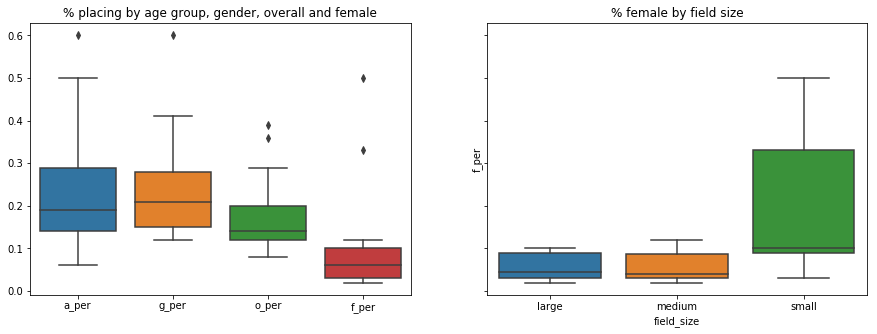

In [42]:
f, axes = plt.subplots(1, 2, sharey = True, figsize=(15,5))
sns.boxplot(data=p_place_df,  orient='v', ax=axes[0]).set_title('% placing by age group, gender, overall and female')
sns.boxplot(y="f_per", x= "field_size", data=df2,  orient='v', ax=axes[1]).set_title('% female by field size');

#### Cleaning up the % in female field metric by removing outliers.

In [43]:
mean_f_per = df2[df2['f_tot']>15]['f_per'].mean()
count_f_per = df2[df2['f_per']<mean_f_per]['f_per'].count()
prob = count_f_per / fem
print("~~~~~~ Liklihood of placing in the top {}% of Females ~~~~~~".format(round(int(mean_f_per * 100))))
print("Times placed in at least the top {}%: {}".format(round(int(mean_f_per * 100)),count_f_per))
print("Total opportunities to:", fem)
print("Probability of finishing in the top {}%: {}".format(round(int(mean_f_per * 100)),prob))

~~~~~~ Liklihood of placing in the top 6% of Females ~~~~~~
Times placed in at least the top 6%: 11
Total opportunities to: 21
Probability of finishing in the top 6%: 0.5238095238095238


Buy targeting the percentage of female finishers, with field sizes < 15 removed, it is predicted that I will place in the top 6%, which I have done on 52% of occasions.  This is an improvement in the initial 43% for a podium.  Based on the low variation of results for this group, I am comfortable that the percentage of female finishers is the correct dependant variable.

#### Predicting Race Performance based on past % in female field results

In [46]:
pos_df = pd.DataFrame({'o_tot': [entrants], 'gain_km': [gain], 'hr': [est_hr], 'fitness (v02)':[v02]})
pred_fem = .06
fem_17 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2017)]['event_year'].count(),0)
fem_16 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2016)]['event_year'].count(),0)
fem_15 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2015)]['event_year'].count(),0)
print('It is predicted that I will finish in the top {}% of females.'.format(round(pred_fem*100,0)))
print('Therefore, estimated female placings in 2015, 2016, 2017 are {}, {} and {} respectively.'
      .format(fem_15, fem_16, fem_17))

It is predicted that I will finish in the top 6.0% of females.
Therefore, estimated female placings in 2015, 2016, 2017 are 3.0, 3.0 and 5.0 respectively.


In [47]:
rank_df = df
rank_df['gen_rank'] = rank_df.groupby(['gender','event_year'])['pace_fin'].rank(ascending=True)
fem17 = rank_df[(rank_df['event_year']==2017)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==5)]
fem16 = rank_df[(rank_df['event_year']==2016)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==3)]
fem15 = rank_df[(rank_df['event_year']==2015)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==3)]
fem_df = fem15.append(fem16, ignore_index = True)
fem_df = fem_df.append(fem17, ignore_index = True)

fem_s1 = fem_df.pace_s1.mean()
fem_s2 = fem_df.pace_s2.mean()
fem_s3 = fem_df.pace_s3.mean()
fem_s4 = fem_df.pace_s4.mean()
fem_s5 = fem_df.pace_s5.mean()
fem_s6 = fem_df.pace_s6.mean()
fem_s7 = fem_df.pace_s7.mean()
fem_s8 = fem_df.pace_s8.mean()
desc_c = "Race plan per segment based on finishing in the top {}% of females".format(round(pred_fem*100,0))
name_c = 'Top {}% of Females (Past Ave)'.format(round(pred_fem*100,0))
pred_c = race_plan_(fem_s1, fem_s2, fem_s3, fem_s4, fem_s5, fem_s6, fem_s7, fem_s8, prob, name_c)
print("{} results in a predicted finish time of {}.".format(desc_c, pred_c.iloc[8].at['Race Time']))

Race plan per segment based on finishing in the top 6.0% of females results in a predicted finish time of 10h 37m.


This way of estimating performance indicates that I will finish the durfcoast century in 10.5 hours, which is optmistic. To enable me to better predict where I will place in the Surfcoast Century, a linear regression model will also be used, as it may help explain some of the unexplained variation which result in me only achieving the top 6% on half the races I compete in.

## 3.2 Linear Regression Model

#### Choosing Dependent Variables
With the dependent variable being the percentage finish across the field of women (f_per), the target independent variables are listed in the heatmap below.

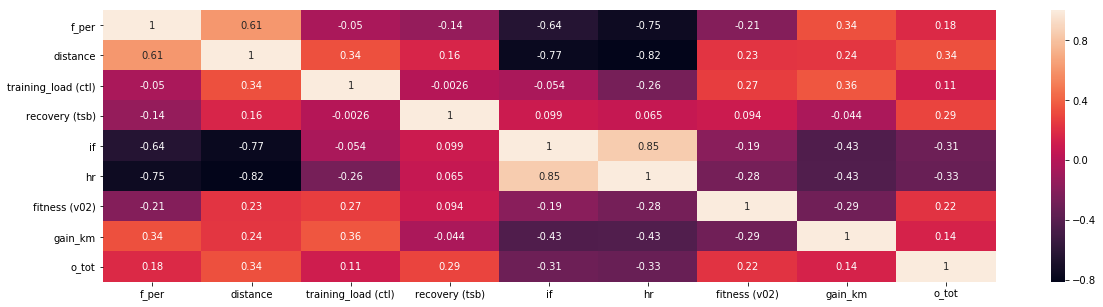

In [53]:
place_cols = ['f_per', 'distance', 'training_load (ctl)', 'recovery (tsb)',  'if', 'hr', 'fitness (v02)', 'gain_km', 
              'o_tot', 'dur_bkt', 'field_size', 'course_gain']
fem_place = df2[df2['f_tot']>15][place_cols]
plt.figure(figsize=(20,5))
sns.heatmap(fem_place.corr(), annot=True);

f_per is strongly correlated with effort (if, hr) and distance, as well as being moderately correlated with gain_km. 

Variable to be using | Colinear variables to drop | Reason for picking the variable
---|---|---
hr | if, distance | hr is the strongest corelated variable to f_per.
gain_km | loss_km, change_km | Elevation gain is the most widely used metric to explain terrain.
fitness (v02) | none | Next strongest variable.
o_tot | none | Next strongest variable.

Therefore: **% of Females (f_per)** = function(hr, gain_km, fitness (v02), o_tot).

In [49]:
y = fem_place[['f_per']]
modeldata = fem_place[['o_tot', 'gain_km', 'hr', 'fitness (v02)']]

#### Initial Linear Regression Model
The Linear Regression model below performs well on training data with an r2 of 79%.  The cross-validation variation of MSA (0.0002 - 0.0007) indicates that the model is also moderately suited to testing data.

In [50]:
lm = linear_model.LinearRegression()
model = lm.fit(modeldata, y)

print("~~~~ Linear Regression Model ~~~~")
print('MSE:', metrics.mean_squared_error(y, lm.predict(modeldata)))
print('R2: ', lm.score(modeldata, y))

mse = model_selection.cross_val_score(lm, modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(lm, modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ Linear Regression Model ~~~~
MSE: 0.00025544905831857744
R2:  0.786138427520857

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
MSE = 0.0005138738379713741[0.00024614 0.00069659 0.00026213 0.00057049 0.00079401]
r2 = 2.958915819651944[12.12762689 -0.24181063 -0.72940933 -0.4662079   4.10438006]


#### Regularising with Ridge

In [51]:
ridge = linear_model.Ridge() 
ridge.fit(modeldata, y) 

print("~~~~ Ridge Model ~~~~")
print('MSE: {}'.format(metrics.mean_squared_error(y, ridge.predict(modeldata))))
print('R2: ', ridge.score(modeldata, y))

mse = model_selection.cross_val_score(linear_model.Ridge(), modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(linear_model.Ridge(), modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ Ridge Model ~~~~
MSE: 0.00025558769259694084
R2:  0.7860223631087764

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
MSE = 0.0005132157771190173[0.0002307  0.00072591 0.00025577 0.00056981 0.00078389]
r2 = 2.786147141068027[11.30414736 -0.20989791 -0.73598253 -0.46684474  4.03931352]


#### Tuning

In [52]:
params = {'alpha': np.logspace(-1, 10, 30), 'fit_intercept': [True, False], 'normalize': [True, False]}
gs = model_selection.GridSearchCV(linear_model.Ridge(), 
                                  param_grid = params, 
                                  cv = 5, 
                                  n_jobs = -1, 
                                  scoring = 'neg_mean_squared_error')
gs.fit(modeldata, y);
print("~~~~ BEST PARAMETERS ~~~~")
print('Best parameters: {}'.format(gs.best_params_))

t_ridge = linear_model.Ridge(alpha=0.1, fit_intercept = True, normalize = True) 
t_ridge.fit(modeldata, y)
print("\n~~~~ Tuned vs Ridge Model ~~~~")
print('MSE: {} vs {}'.format(metrics.mean_squared_error(y, t_ridge.predict(modeldata)), 
                             metrics.mean_squared_error(y, ridge.predict(modeldata))))
print('r2: {} vs {}'.format(t_ridge.score(modeldata, y), ridge.score(modeldata, y)))

mse = model_selection.cross_val_score(t_ridge, modeldata, y, scoring = 'neg_mean_squared_error', cv = 5)
r2 = model_selection.cross_val_score(t_ridge, modeldata, y, scoring = 'r2', cv = 5)
print("\n~~~~ SUMMARY OF CROSS VALIDATION FOR TUNED RIDGE ~~~~")
print('MSE = {}{}'.format(- mse.mean(), - mse))
print('r2 = {}{}'.format(- r2.mean(), - r2))

~~~~ BEST PARAMETERS ~~~~
Best parameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': True}

~~~~ Tuned vs Ridge Model ~~~~
MSE: 0.00028165393082867877 vs 0.00025558769259694084
r2: 0.7641997471494596 vs 0.7860223631087764

~~~~ SUMMARY OF CROSS VALIDATION FOR TUNED RIDGE ~~~~
MSE = 0.0004851798457777591[0.00014845 0.00077626 0.00022359 0.00058182 0.00069577]
r2 = 1.8021005679171889[ 6.91758251 -0.15509371 -0.76919319 -0.45560516  3.47281238]


#### Predicting Race Performance
Regularisation and Tuning didn't have any impact on the accuracy of the model, so the initial linear regression model had been used to predict my Surfcoast placing as a percentage of all females.  With an r2 score of 79%, this is a significant improvement from the prediction that I made without a model.


In [28]:
pos_df = pd.DataFrame({'o_tot': [entrants], 'gain_km': [gain], 'hr': [est_hr], 'fitness (v02)':[v02]})
pred_fem = lm.predict(pos_df).max()
fem_17 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2017)]['event_year'].count(),0)
fem_16 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2016)]['event_year'].count(),0)
fem_15 = round(pred_fem * df[(df['gender']=="Female") & (df['event_year']==2015)]['event_year'].count(),0)
print('It is predicted that I will finish in the top {}% of females.'.format(round(pred_fem*100,0)))
print('Therefore, estimated female placings in 2015, 2016, 2017 are {}, {} and {} respectively.'.format(fem_15, fem_16, fem_17))

It is predicted that I will finish in the top 18.0% of females.
Therefore, estimated female placings in 2015, 2016, 2017 are 10.0, 10.0 and 14.0 respectively.


In [29]:
cols_to_keep = ['pace_fin', 'pace_s1', 'pace_s2', 'pace_s3', 
                'pace_s4', 'pace_s5', 'pace_s6', 'pace_s7', 'pace_s8']
rank_df = df
rank_df['gen_rank'] = rank_df.groupby(['gender','event_year'])['pace_fin'].rank(ascending=True)
fem17 = rank_df[(rank_df['event_year']==2017)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==14)]
fem16 = rank_df[(rank_df['event_year']==2016)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==10)]
fem15 = rank_df[(rank_df['event_year']==2015)&(rank_df['gender']=='Female')&(rank_df['gen_rank']==10)]
fem_df = fem15.append(fem16, ignore_index = True)
fem_df = fem_df.append(fem17, ignore_index = True)

fem_s1 = fem_df.pace_s1.mean()
fem_s2 = fem_df.pace_s2.mean()
fem_s3 = fem_df.pace_s3.mean()
fem_s4 = fem_df.pace_s4.mean()
fem_s5 = fem_df.pace_s5.mean()
fem_s6 = fem_df.pace_s6.mean()
fem_s7 = fem_df.pace_s7.mean()
fem_s8 = fem_df.pace_s8.mean()
desc_d = "Race plan per segment based on finishing in the top {}% of females".format(round(pred_fem*100,0))
name_d = 'Top {}% of Females (LR)'.format(round(pred_fem*100,0))
pred_d = race_plan_(fem_s1, fem_s2, fem_s3, fem_s4, fem_s5, fem_s6, fem_s7, fem_s8, lm.score(modeldata, y),name_d)
print("{} results in a predicted finish time of {}.".format(desc_d, pred_d.iloc[8].at['Race Time']))

Race plan per segment based on finishing in the top 18.0% of females results in a predicted finish time of 12h 33m.


# 4.0 Conclusion


## 4.1 Model Output Summary

The four different race predictions are depicted in the chart below and range from 9.5 to 13.5hours.  There is a difference of 4 gels and 3 litres of energy drink and in terms of illumination, a difference between not need a headlap at all vs having to wear one for 2.5 hours. 

## 4.2 Areas where new data could help improve the model

The models could be improved by making them more accurate with broader and larger sample sizes.  These also could be made more varsatile so that the can be easily reconfigured to predict race times on a variety of courses for a variety of athletes.  Based on this, key areas for improvement are as follows:

- **Larger Athlete Sample Size:** Athlete's don't race often enough so race information is either too small or too old.   To get better sample sizes, athlete training data needs to be included also.  This would skew the the models as traiing runs are not run at race intensity.  Therefore, the inclusion of this data would need to be accompanied by a model that can use 'intensity factor' to adjust for this.


- **Environmental Data: ** More in depth environmental data would help with pacing predictions, and further explaining uncertainties.  This would include wind direction, wind strength, temperature and humidity.


- **Course Information: **More in depth course data would also help improve the model.  This could include GPS course date which includes elevation change, direction and pace every 3 metres, which could be used to better predict hill climbing speeds, as well as recognising technical trails with lots of direction changes.  Ideally , these could also be transposed to determine the groud under foot (sand, road, trail, stairs, river crossing).


- **Equipment: ** Using some the advanced course and environmental information above, further equipment recommendations could be built into the model, including hills that benefit from trekking poles, potential change of shoes after river crossings and expected temp at each segment to help determine running clothes.

,Model Name,Race Time,Arrival Time,Gels Taken,Perpetuam (1 tab),Fluids Taken (ml),Dark (mins),R2
0,Using own race metrics (random forest),9h 30m,1900-01-01 17:00:27,9.507698,9.507698,6655.388250,0,0.944219
0,Top 6.0% of Females (Past Ave),10h 37m,1900-01-01 18:07:35,10.626558,10.626558,7438.590833,0,0.523810
0,Top 18.0% of Females (LR),12h 33m,1900-01-01 20:03:25,12.557090,12.557090,8789.963000,87.4167,0.786138
0,Using own race metrics (lasso),13h 29m,1900-01-01 20:59:40,13.494696,13.494696,9446.287246,143.669,0.776773


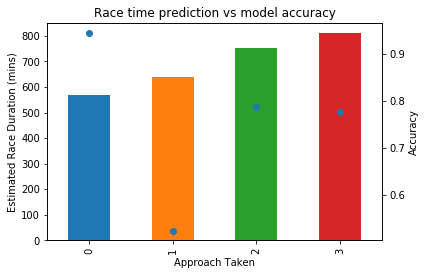

In [30]:
combo = pred_a.append([pred_b, pred_c, pred_d])
summary = combo[(combo['Segment']=='fin')].sort_values(by=['Arrival Time'])
fig = plt.figure()
ax = summary['Duration (mins)'].plot(kind='bar', use_index=False, x = summary['Model Name'], y = summary['Duration (mins)'])
ax.set_title("Race time prediction vs model accuracy")
ax.set_ylabel("Estimated Race Duration (mins)")
ax.set_xlabel("Approach Taken")
ax2 = ax.twinx()
ax2.plot(summary['R2'].values, linestyle='', marker='o', linewidth=2.0)
ax2.set_ylabel("Accuracy");
summary[['Model Name', 'Race Time', 'Arrival Time', 'Gels Taken', 'Perpetuam (1 tab)', 
         'Fluids Taken (ml)', 'Dark (mins)', 'R2']]


## 4.3 Final Output: The  Race Plan

Based on the r2, MSE and cross validation results, the best model to choose is the linear regression model which predicted me finishing in the top 18% of females.  Based on 3 years of Surfcoast Century data, this would place me 10th, 10th and 14th across 2015-2017 respectively and would result in a mean finish time of 12:33.  

Using the individual segment results from these females, the following race plan can by built, which covers per segment:

    1) Best running pace to pace adequately throughout the 100km
    2) Expected arrival time at each checkpoint to not keep supporters waiting.
    3) Nutrition requirements in terms of energy drink, gels and perpertuam tabs so I don't run out or carry too much.
    4) Predicted time in the dark so that I know when to carry a headlamp.
    5) Race duration so that I know if I am on track.
    
 This race plan is below:

In [31]:
pred_d

,Model Name,Segment,Distance,Pace (mins/km),Duration (mins),Race Time,Arrival Time,Gels Taken,Perpetuam (1 tab),Fluids Taken (ml),Dark (mins),R2
0,Top 18.0% of Females (LR),s1,10.29,7.496667,77.140700,1h 17m,1900-01-01 08:47:08,1.285678,1.285678,899.974833,0,0.786138
0,Top 18.0% of Females (LR),s2,10.03,6.590000,66.097700,2h 23m,1900-01-01 09:53:14,1.101628,1.101628,771.139833,0,0.786138
0,Top 18.0% of Females (LR),s3,10.56,6.610000,69.801600,3h 33m,1900-01-01 11:03:02,1.163360,1.163360,814.352000,0,0.786138
0,Top 18.0% of Females (LR),s4,18.48,7.170000,132.501600,5h 45m,1900-01-01 13:15:32,2.208360,2.208360,1545.852000,0,0.786138
0,Top 18.0% of Females (LR),s5,20.46,7.976667,163.202600,8h 28m,1900-01-01 15:58:44,2.720043,2.720043,1904.030333,0,0.786138
0,Top 18.0% of Females (LR),s6,7.66,8.796667,67.382467,9h 36m,1900-01-01 17:06:07,1.123041,1.123041,786.128778,0,0.786138
0,Top 18.0% of Females (LR),s7,8.39,8.186667,68.686133,10h 44m,1900-01-01 18:14:48,1.144769,1.144769,801.338222,0,0.786138
0,Top 18.0% of Females (LR),s8,14.13,7.686667,108.612600,12h 33m,1900-01-01 20:03:25,1.810210,1.810210,1267.147000,87.4167,0.786138
0,Top 18.0% of Females (LR),fin,100.00,7.534254,753.425400,12h 33m,1900-01-01 20:03:25,12.557090,12.557090,8789.963000,87.4167,0.786138
